# TC1002S Herramientas computacionales: el arte de la analítica

This is a notebook with all your work for the final evidence of this course


# Niveles de dominio a demostrar con la evidencia

### SING0202A

Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.


# Student information

- Name: Alexa Serrano Negrete

- ID: A01654063

- My carreer: ITD


# Importing libraries

In [1]:
import pandas as pd                # data handling
import seaborn as sns              # advanced plotting
import matplotlib.pyplot as plt    # showing plots
from sklearn.cluster import KMeans # KMeans

# A1 Load data

In [2]:
route = "datasets\evidence\A01654063.csv"
dataset = pd.read_csv(route)
dataset

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,4.189074,3.732321,9.516071,-1.359348,8.821091,-5.181471
1,1,-5.647686,0.706721,1.608364,-1.006090,-6.440867,-7.721717
2,2,-10.286287,7.290638,-8.313899,-3.794285,-7.906918,-1.621051
3,3,4.476758,0.990846,9.957301,-3.007903,12.028914,-6.702198
4,4,-6.648713,7.156131,-7.473465,-4.510548,-6.663263,-1.507599
...,...,...,...,...,...,...,...
4058,4058,4.466261,5.754953,10.912500,-3.065646,11.768007,-1.093393
4059,4059,-6.781251,0.470342,-1.040925,-0.024503,-6.896134,-5.885424
4060,4060,3.400212,7.161815,10.038655,-2.393863,11.625088,-5.401576
4061,4061,-9.776543,4.495403,-7.339090,-5.420510,-8.589697,1.157640


# A2 Data managment


Print the first 7 rows

In [3]:
dataset.head(7)

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,4.189074,3.732321,9.516071,-1.359348,8.821091,-5.181471
1,1,-5.647686,0.706721,1.608364,-1.006090,-6.440867,-7.721717
2,2,-10.286287,7.290638,-8.313899,-3.794285,-7.906918,-1.621051
3,3,4.476758,0.990846,9.957301,-3.007903,12.028914,-6.702198
4,4,-6.648713,7.156131,-7.473465,-4.510548,-6.663263,-1.507599
5,5,3.623427,4.115737,11.175759,0.431562,7.968831,-3.979030
6,6,-9.582420,-0.451996,1.754526,0.697925,-6.212204,-7.536951


Print the first 4 last rows

In [4]:
dataset.tail(4)

,Unnamed: 0,x1,x2,x3,x4,x5,x6
4059,4059,-6.781251,0.470342,-1.040925,-0.024503,-6.896134,-5.885424
4060,4060,3.400212,7.161815,10.038655,-2.393863,11.625088,-5.401576
4061,4061,-9.776543,4.495403,-7.339090,-5.420510,-8.589697,1.157640
4062,4062,-5.178361,-0.886019,2.412008,0.073035,-5.529280,-6.993435


How many rows and columns are in your data?

Use the `shape` method


In [5]:
NumRow, NumCol = dataset.shape
print(NumRow)
print(NumCol)

4063
7


Print the name of all columns 

Use the `columns` method

In [6]:
dataset.columns

Index(['Unnamed: 0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype='object')

What is the data type in each column

Use the `dtypes` method 

In [7]:
dataset.dtypes

Unnamed: 0      int64
x1            float64
x2            float64
x3            float64
x4            float64
x5            float64
x6            float64
dtype: object

What is the meaning of rows and columns?

* Rows are objetcs that represent the amount of observations. 

* Columns are variables within the dataset. They have numbers and names.


Print a statistical summary of your columns


In [8]:
dataset.describe()

,Unnamed: 0,x1,x2,x3,x4,x5,x6
count,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000,4063.000000
mean,2031.000000,-4.421576,3.529652,1.040789,-2.497435,-1.637643,-4.088622
std,1173.031401,5.486916,2.763264,6.918306,2.318295,8.389256,3.105784
min,0.000000,-13.832683,-5.272999,-11.354547,-9.146679,-13.651639,-12.546067
25%,1015.500000,-8.717543,1.211860,-5.808499,-4.236331,-8.118197,-6.483360
50%,2031.000000,-6.783133,4.191291,0.356724,-2.565624,-5.950201,-4.482878
75%,3046.500000,1.981022,5.625961,8.694281,-0.754519,8.867809,-1.457496
max,4062.000000,7.807475,10.628096,14.184945,4.985450,14.676125,3.689236


1) What is the minumum and maximum values of each variable
   * min	0.000000	-13.832683	-5.272999	-11.354547	-9.146679	-13.651639	-12.546067

   * max	4062.000000	7.807475	10.628096	14.184945	4.985450	14.676125	3.689236



2) What is the mean and standar deviation of each variable
   * mean	2031.000000	-4.421576	3.529652	1.040789	-2.497435	-1.637643	-4.088622
   * std	1173.031401	5.486916	2.763264	6.918306	2.318295	8.389256	3.105784



3) What the 25%, 50% and 75% represent?
   * The quartiles in the dataset


Rename the columns using the same name with capital letters

In [9]:
dataset = dataset.rename(columns = {"x1":"X1", "x2":"X2", "x3":"X3", "x4":"X4", "x5":"X5", "x6":"X6"})
dataset

,Unnamed: 0,X1,X2,X3,X4,X5,X6
0,0,4.189074,3.732321,9.516071,-1.359348,8.821091,-5.181471
1,1,-5.647686,0.706721,1.608364,-1.006090,-6.440867,-7.721717
2,2,-10.286287,7.290638,-8.313899,-3.794285,-7.906918,-1.621051
3,3,4.476758,0.990846,9.957301,-3.007903,12.028914,-6.702198
4,4,-6.648713,7.156131,-7.473465,-4.510548,-6.663263,-1.507599
...,...,...,...,...,...,...,...
4058,4058,4.466261,5.754953,10.912500,-3.065646,11.768007,-1.093393
4059,4059,-6.781251,0.470342,-1.040925,-0.024503,-6.896134,-5.885424
4060,4060,3.400212,7.161815,10.038655,-2.393863,11.625088,-5.401576
4061,4061,-9.776543,4.495403,-7.339090,-5.420510,-8.589697,1.157640


Rename the columns to their original names

In [10]:
dataset = dataset.rename(columns = {"X1":"x1", "X2":"x2", "X3":"x3", "X4":"x4", "X5":"x5", "X6":"x6"})
dataset

,Unnamed: 0,x1,x2,x3,x4,x5,x6
0,0,4.189074,3.732321,9.516071,-1.359348,8.821091,-5.181471
1,1,-5.647686,0.706721,1.608364,-1.006090,-6.440867,-7.721717
2,2,-10.286287,7.290638,-8.313899,-3.794285,-7.906918,-1.621051
3,3,4.476758,0.990846,9.957301,-3.007903,12.028914,-6.702198
4,4,-6.648713,7.156131,-7.473465,-4.510548,-6.663263,-1.507599
...,...,...,...,...,...,...,...
4058,4058,4.466261,5.754953,10.912500,-3.065646,11.768007,-1.093393
4059,4059,-6.781251,0.470342,-1.040925,-0.024503,-6.896134,-5.885424
4060,4060,3.400212,7.161815,10.038655,-2.393863,11.625088,-5.401576
4061,4061,-9.776543,4.495403,-7.339090,-5.420510,-8.589697,1.157640


Use two different alternatives to get one of the columns

In [11]:
# Method 1
Method1 = dataset.iloc[:,1]
print(Method1)

print()

# Method 2
Method2 = dataset.x1
print(Method2)

0        4.189074
1       -5.647686
2      -10.286287
3        4.476758
4       -6.648713
          ...    
4058     4.466261
4059    -6.781251
4060     3.400212
4061    -9.776543
4062    -5.178361
Name: x1, Length: 4063, dtype: float64

0        4.189074
1       -5.647686
2      -10.286287
3        4.476758
4       -6.648713
          ...    
4058     4.466261
4059    -6.781251
4060     3.400212
4061    -9.776543
4062    -5.178361
Name: x1, Length: 4063, dtype: float64


Get a slice of your data set: second and thrid columns and rows from 62 to 72

In [12]:
dataset.loc[62:72, ["x1", "x2"]]

,x1,x2
62,-9.856882,4.534906
63,3.883438,9.819095
64,-9.383331,3.079582
65,6.307225,6.521932
66,-9.475404,4.343212
67,5.246432,4.641852
68,-8.159704,5.457846
69,5.482782,4.303073
70,1.373211,7.471359
71,1.768024,3.321496


For the second and thrid columns, calculate the number of null and not null values and verify that their sum equals the total number of rows

In [13]:
REVIEWED = dataset.iloc[:, 2:4]
print("NULL Values:\n",REVIEWED.isnull().sum())
print("\n\nNot NULL Values:\n",REVIEWED.notnull().sum())

NULL Values:
 x2    0
x3    0
dtype: int64


Not NULL Values:
 x2    4063
x3    4063
dtype: int64


Discard the last column


In [14]:
dataset.drop(["x6"], axis = "columns", inplace = True)
dataset

,Unnamed: 0,x1,x2,x3,x4,x5
0,0,4.189074,3.732321,9.516071,-1.359348,8.821091
1,1,-5.647686,0.706721,1.608364,-1.006090,-6.440867
2,2,-10.286287,7.290638,-8.313899,-3.794285,-7.906918
3,3,4.476758,0.990846,9.957301,-3.007903,12.028914
4,4,-6.648713,7.156131,-7.473465,-4.510548,-6.663263
...,...,...,...,...,...,...
4058,4058,4.466261,5.754953,10.912500,-3.065646,11.768007
4059,4059,-6.781251,0.470342,-1.040925,-0.024503,-6.896134
4060,4060,3.400212,7.161815,10.038655,-2.393863,11.625088
4061,4061,-9.776543,4.495403,-7.339090,-5.420510,-8.589697


### Questions 

Based on the previous results, provide a description of yout dataset

Your response:

The dataset has seven different columns (variables) and 4063 rows. Each one is measured for 0 to x6.



# A3 Data visualization

Plot in the same figure the histogram of the two variables

C:\Users\alexa\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'x2, x3')

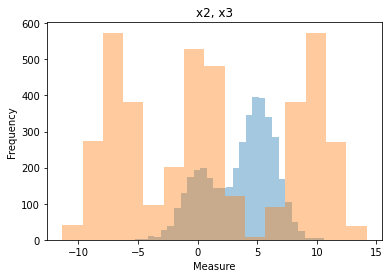

In [15]:
# Based on REVIEWED
sns.distplot(dataset["x2"], kde = False)
Y = sns.distplot(dataset["x3"], kde = False)
Y.set_ylabel("Frequency")
Y.set_xlabel("Measure")
Y.set_title("x2, x3")

Based on this plots, provide a description of your data:

Your response here: Mean stays fixated, they are similar but scalated.

Plot in the same figure the boxplot of the two variables 

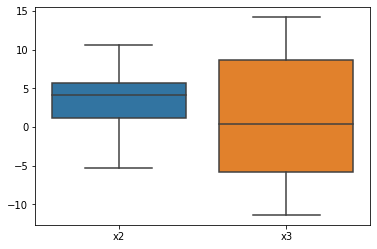

In [16]:
x = dataset.loc[:,["x2", "x3"]]
sns.boxplot(data = x, orient = "v")
plt.show()

Scatter plot of the two variables

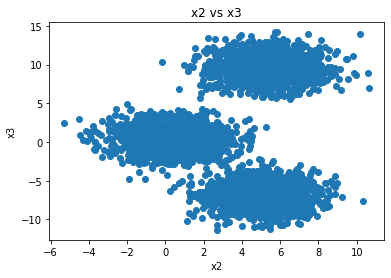

In [17]:
plt.scatter(dataset.x2, dataset.x3)
plt.title('x2 vs x3')
plt.xlabel('x2')
plt.ylabel('x3')
plt.show()

### Questions 

Based on the previos plots, provide a description of yout dataset

Your response:
x3 has a higher density than x2. The pairplot below shows all graphs from 0 to x5.

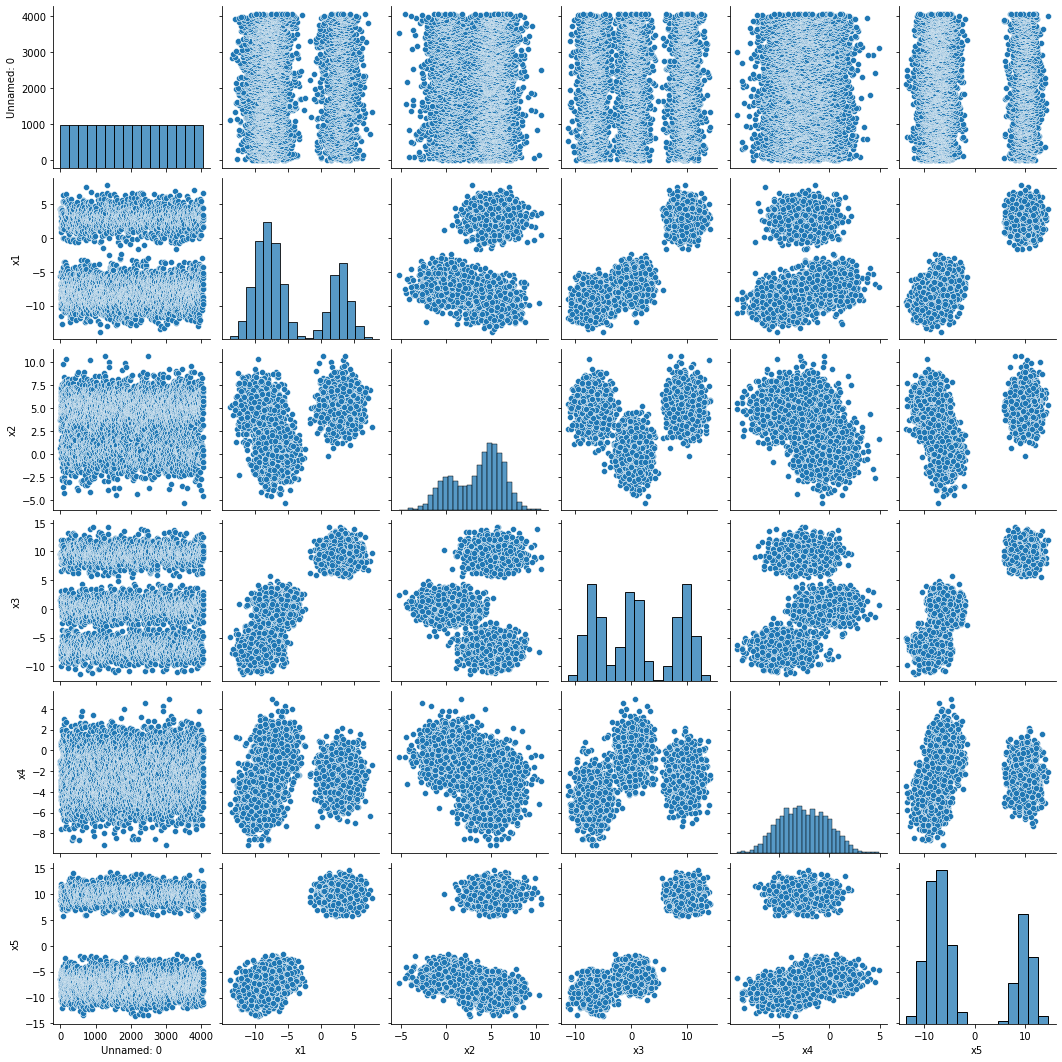

In [18]:
sns.pairplot(dataset)

# A4 Kmeans

Do Kmeans clustering assuming a number of clusters accorging to your scatter plot

In [19]:
km = KMeans(n_clusters = 2)
yp = km.fit_predict(REVIEWED[["x2", "x3"]])
print(yp)

[0 1 1 ... 0 1 1]


Add to your dataset a column with the assigned cluster to each data point

In [20]:
REVIEWED['Cluster'] = yp
REVIEWED

,x2,x3,Cluster
0,3.732321,9.516071,0
1,0.706721,1.608364,1
2,7.290638,-8.313899,1
3,0.990846,9.957301,0
4,7.156131,-7.473465,1
...,...,...,...
4058,5.754953,10.912500,0
4059,0.470342,-1.040925,1
4060,7.161815,10.038655,0
4061,4.495403,-7.339090,1


Print the number associated to each cluster

In [21]:
print(REVIEWED.Cluster.unique())

[0 1]


Print the centroids

In [22]:
km.cluster_centers_

array([[ 5.24010693,  9.59507484],
       [ 2.66428173, -3.28708393]])

Print the intertia metric

In [23]:
km.inertia_

69001.30974124135

Plot a scatter plot of your data assigned to each cluster. Also plot the centroids

C:\Users\alexa\AppData\Local\Temp/ipykernel_24748/121584039.py:4: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(set1.x2, set1.x3, Label = 'x2 aprox')
C:\Users\alexa\AppData\Local\Temp/ipykernel_24748/121584039.py:5: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(set2.x2, set2.x3, Label = 'x3 aprox')


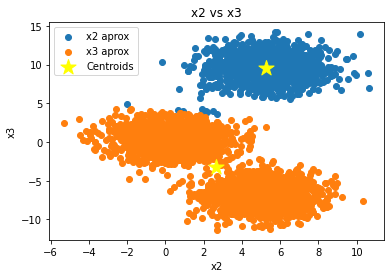

In [24]:
set1 = REVIEWED[REVIEWED.Cluster == 0]
set2 = REVIEWED[REVIEWED.Cluster == 1]

plt.scatter(set1.x2, set1.x3, Label = 'x2 aprox')
plt.scatter(set2.x2, set2.x3, Label = 'x3 aprox')

plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color = 'yellow', marker='*', label='Centroids', s=256)

plt.title('x2 vs x3')
plt.xlabel('x2')
plt.ylabel('x3')
plt.legend()
plt.show()

### Questions 

Provides a detailed description of your results

Your response: The two data used are REVIEWED (x2, x3). The centroids are well placed, and in the estimate of x2, one can perceive that the centroid is quite lonesome.

# A4 Elbow plot

Compute the Elbow plot

In [26]:
Krange = range(1,10)
sse = []
for k in Krange:
    km = KMeans(n_clusters = k)
    km.fit_predict(dataset[['x2', 'x3']])
    sse.append(km.inertia_)

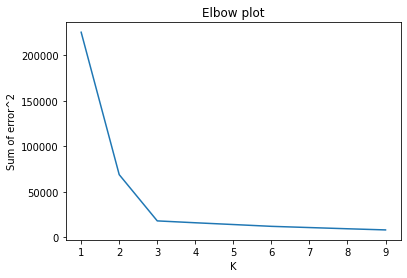

In [27]:
plt.plot(Krange, sse)
plt.title('Elbow plot')
plt.xlabel('K')
plt.ylabel('Sum of error^2')
plt.show()

### Questions 

What is the best number of clusters K? (argue your response)

Your response: More clusters are necessary because of the amount of data that is being handled. Notwithstanding, the simplest way to resume the data is through the two main datasources used *x2, x3*


Does this number of clusters agree with your inital guess? (argue your response)

Your response: No, because for an optimized solution, at least three clusters would have been necessary



# Descipcion de tu percepcion del nivel de desarrollo de la subcompetencia 

### SING0202A Interpretación de variables


Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Interpreta interacciones**. Interpreta interacciones entre variables relevantes en un problema, como base para la construcción de modelos bivariados basados en datos de un fenómeno investigado que le permita reproducir la respuesta del mismo.

Escribe tu description del nivel de logro del siguiente criterio de la subcompetencia

**Construcción de modelos**. Es capaz de construir modelos bivariados que expliquen el comportamiento de un fenómeno.

Tu respuesta: